In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
df.shape

(8124, 23)

In [6]:
def Encoder(val):
    if val in category:
        return category[val]
    else:
        category[val]=len(category)
    return category[val]

In [7]:
for i in range(df.shape[1]):
    category={}
    df.iloc[:,i]=df.iloc[:,i].apply(Encoder)

In [8]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.112110,0.169663,-0.042028,-0.501530,-0.582015,0.129200,0.348387,0.540024,-0.412869,...,-0.532452,-0.225294,-0.098476,NaN,0.120766,0.152261,-0.556515,-0.560715,-0.155254,-0.191297
cap-shape,-0.112110,1.000000,-0.057205,0.001839,0.120509,0.175229,0.040082,-0.043906,-0.151921,0.218627,...,0.074161,0.073171,0.056450,NaN,0.042988,0.058422,0.099599,0.219476,0.139616,0.169343
cap-surface,0.169663,-0.057205,1.000000,0.016133,-0.047265,-0.106147,-0.186157,0.029686,0.267029,-0.266708,...,0.090350,0.080218,0.092631,NaN,-0.171918,-0.074779,0.107866,-0.283378,0.185359,-0.089972
cap-color,-0.042028,0.001839,0.016133,1.000000,-0.065879,0.115960,-0.163457,-0.012795,0.015113,0.023458,...,-0.042124,-0.063978,-0.065686,NaN,-0.172176,0.184474,0.040785,0.055050,0.070150,0.003142
bruises,-0.501530,0.120509,-0.047265,-0.065879,1.000000,0.588456,0.137359,0.299473,-0.369596,0.325408,...,0.530214,0.267325,0.208451,NaN,0.125606,-0.014367,0.685119,0.543409,-0.008293,0.185130
odor,-0.582015,0.175229,-0.106147,0.115960,0.588456,1.000000,-0.016816,-0.155748,-0.444492,0.599497,...,0.353683,0.214888,0.101501,NaN,-0.056362,-0.009788,0.460625,0.563857,0.277777,0.449061
gill-attachment,0.129200,0.040082,-0.186157,-0.163457,0.137359,-0.016816,1.000000,-0.071489,0.108984,0.184927,...,-0.100591,0.514289,0.595280,NaN,0.842230,0.049642,-0.073149,0.296461,0.164873,0.296916
gill-spacing,0.348387,-0.043906,0.029686,-0.012795,0.299473,-0.155748,-0.071489,1.000000,0.108333,-0.274645,...,-0.112643,-0.309026,-0.233907,NaN,-0.034235,0.206233,-0.038015,-0.173491,-0.474326,-0.341360
gill-size,0.540024,-0.151921,0.267029,0.015113,-0.369596,-0.444492,0.108984,0.108333,1.000000,-0.518717,...,-0.049072,0.186706,0.226610,NaN,0.074866,0.190112,-0.071459,-0.355811,-0.041683,-0.343122
gill-color,-0.412869,0.218627,-0.266708,0.023458,0.325408,0.599497,0.184927,-0.274645,-0.518717,1.000000,...,0.146393,0.188830,0.115547,NaN,0.169267,0.016427,0.181942,0.586547,0.293919,0.557094


In [9]:
X=df.drop('class',axis=1)

In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1


In [11]:
pca = PCA(n_components=2).fit(X)

In [12]:
pca_2d = pca.transform(X)

In [13]:
twss=[]
sa=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(pca_2d)
    Ypreds=kmeans.predict(pca_2d)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(pca_2d, Ypreds))

Text(0,0.5,'Total within-cluster sum of squares')

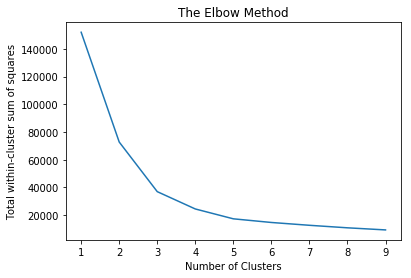

In [14]:
plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0,0.5,'Average silhouette score')

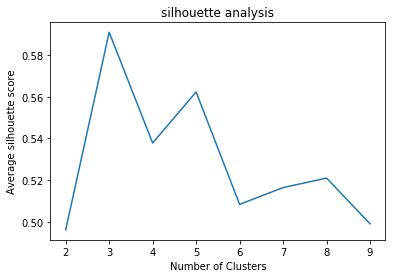

In [15]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

For n_clusters = 2 The average silhouette_score is : 0.496023359269


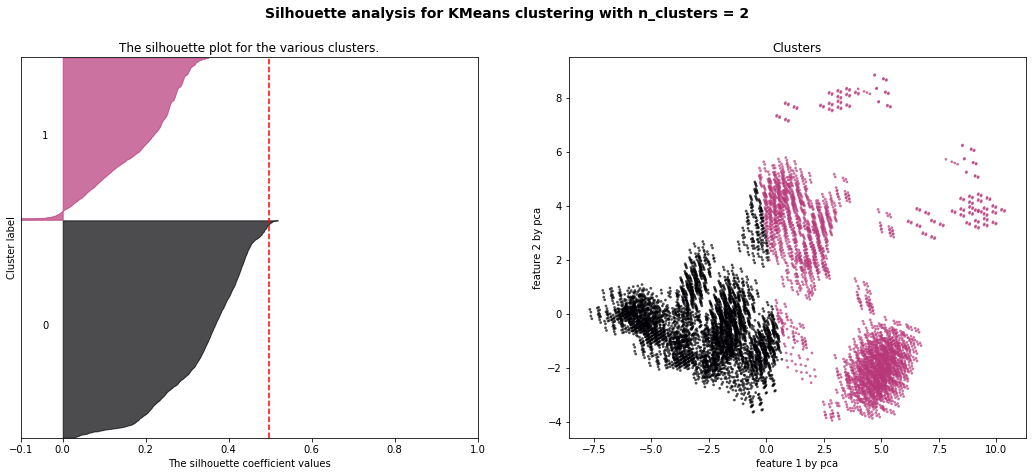

For n_clusters = 3 The average silhouette_score is : 0.590995253703


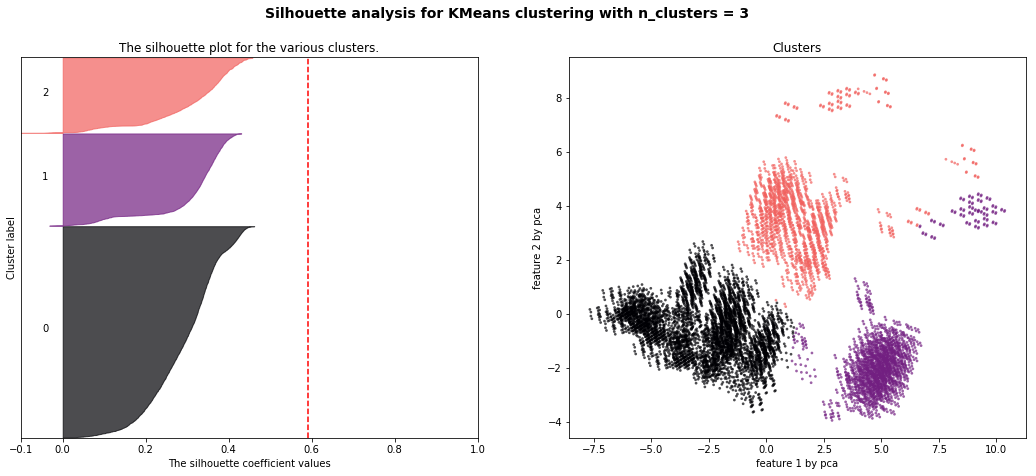

In [25]:
for n_clusters in range(2,4):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_2d)
    silhouette_avg = silhouette_score(pca_2d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.magma(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.magma(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d[:, 0], pca_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("Clusters")
    ax2.set_xlabel("feature 1 by pca")
    ax2.set_ylabel("feature 2 by pca")

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('sample'+str(n_clusters)+'.png')
    plt.show()

In [21]:
kmeans = KMeans(n_clusters=2, init= 'k-means++')


In [22]:
kmeans.fit(X)
Ypreds=kmeans.predict(X)

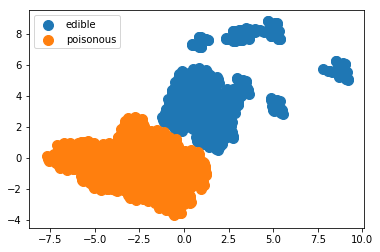

In [24]:
plt.scatter(pca_2d[Ypreds == 0, 0], pca_2d[Ypreds == 0, 1], s = 100, label = 'edible')
plt.scatter(pca_2d[Ypreds == 1, 0], pca_2d[Ypreds == 1, 1], s = 100, label = 'poisonous')
plt.legend()